In [1]:
import ll

ll.pretty()

In [2]:
import datasets

dataset = datasets.load_dataset("nimashoghi/wbm", split="train")
dataset.set_format("numpy")
dataset

[17:14:04] INFO     PyTorch version 2.2.1 available.                                                   ]8;id=648021;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py\config.py]8;;\:]8;id=130286;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py#58\58]8;;\

Dataset({
    features: ['formula', 'n_sites', 'volume', 'uncorrected_energy', 'e_form_per_atom_wbm', 'e_above_hull_wbm', 'bandgap_pbe', 'wyckoff_spglib_initial_structure', 'uncorrected_energy_from_cse', 'e_correction_per_atom_mp2020', 'e_correction_per_atom_mp_legacy', 'e_form_per_atom_uncorrected', 'e_form_per_atom_mp2020_corrected', 'e_above_hull_mp2020_corrected_ppd_mp', 'site_stats_fingerprint_init_final_norm_diff', 'wyckoff_spglib', 'unique_prototype', 'formula_from_cse', 'initial_structure', 'id', 'material_id', 'frac_pos', 'cart_pos', 'pos', 'cell', 'num_atoms', 'atomic_numbers', 'composition'],
    num_rows: 256963
})

In [3]:
atomic_number_counts_wbm = dataset["composition"].sum(axis=0)
atomic_number_counts_wbm

array[120] i64 x∈[0, 150013] μ=1.662e+04 σ=1.929e+04

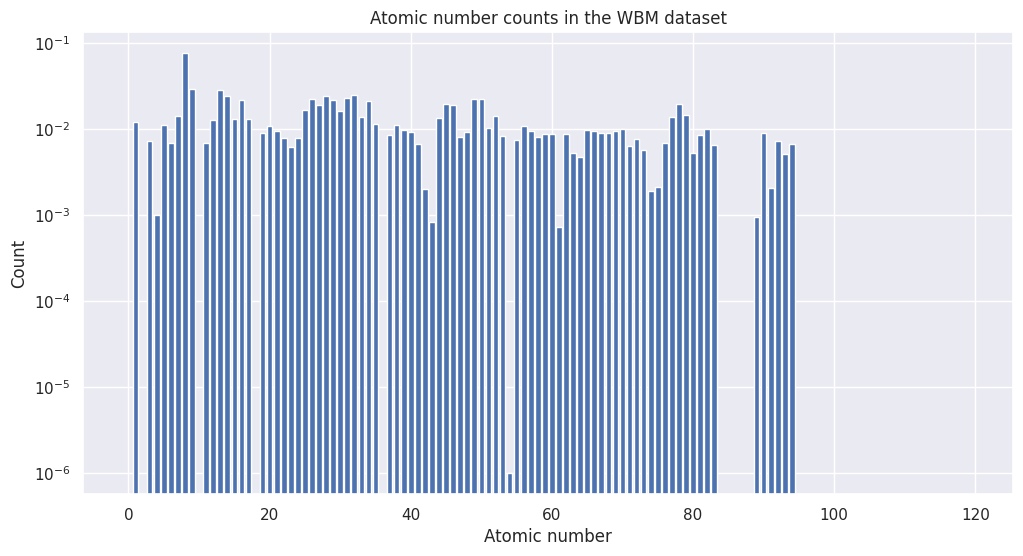

In [4]:
# Draw a bar chart of the atomic number counts
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(12, 6))
plt.bar(
    np.arange(len(atomic_number_counts_wbm)),
    atomic_number_counts_wbm / atomic_number_counts_wbm.sum(),
)
plt.xlabel("Atomic number")
plt.ylabel("Count")
plt.title("Atomic number counts in the WBM dataset")
# make y log scale
plt.yscale("log")
plt.show()

In [5]:
import datasets

dataset = datasets.load_dataset("nimashoghi/mptrj", split="train")
dataset.set_format("numpy")
dataset

Dataset({
    features: ['numbers', 'positions', 'forces', 'cell', 'pbc', 'energy', 'stress', 'e_per_atom_relaxed', 'mp_id', 'energy_per_atom', 'ef_per_atom_relaxed', 'corrected_total_energy', 'ef_per_atom', 'task_id', 'calc_id', 'ionic_step', 'filename', 'extxyz_id', 'num_atoms', 'corrected_total_energy_relaxed', 'energy_referenced', 'corrected_total_energy_referenced', 'corrected_total_energy_relaxed_referenced', 'composition'],
    num_rows: 1559916
})

In [6]:
atomic_number_counts_mptrj = dataset["composition"].sum(axis=0)
atomic_number_counts_mptrj

array[120] i64 x∈[0, 17999101] μ=4.055e+05 σ=1.669e+06

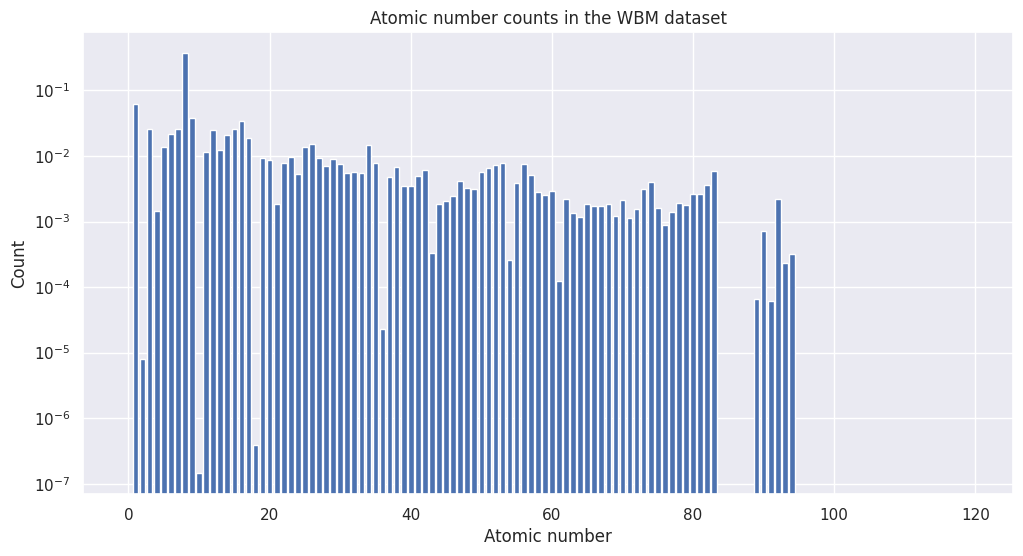

In [7]:
# Draw a bar chart of the atomic number counts
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(12, 6))
plt.bar(
    np.arange(len(atomic_number_counts_mptrj)),
    atomic_number_counts_mptrj / atomic_number_counts_mptrj.sum(),
)
plt.xlabel("Atomic number")
plt.ylabel("Count")
plt.title("Atomic number counts in the WBM dataset")
# make y log scale
plt.yscale("log")
plt.show()

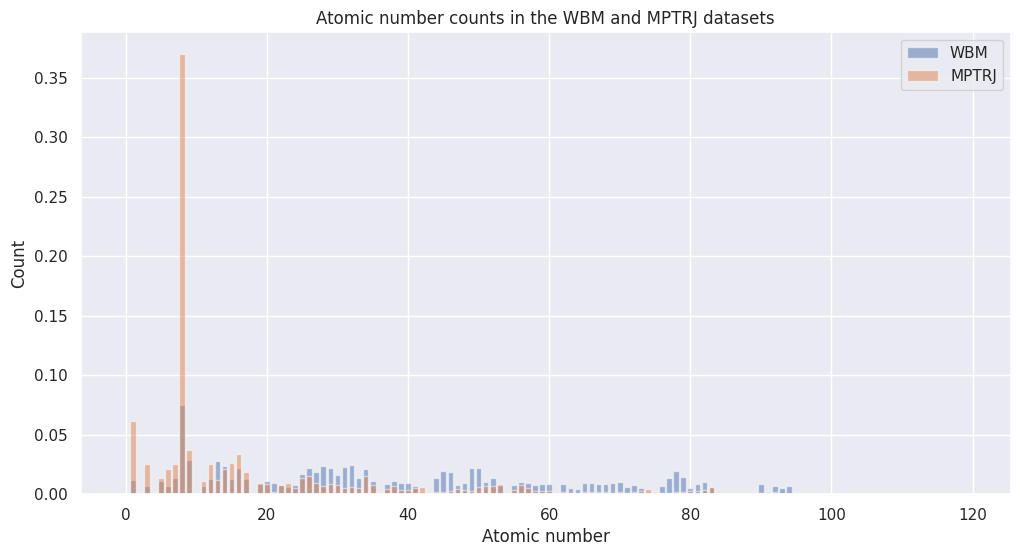

In [8]:
# Now, draw both

plt.figure(figsize=(12, 6))
plt.bar(
    np.arange(len(atomic_number_counts_wbm)),
    atomic_number_counts_wbm / atomic_number_counts_wbm.sum(),
    alpha=0.5,
    label="WBM",
)
plt.bar(
    np.arange(len(atomic_number_counts_mptrj)),
    atomic_number_counts_mptrj / atomic_number_counts_mptrj.sum(),
    alpha=0.5,
    label="MPTRJ",
)
plt.xlabel("Atomic number")
plt.ylabel("Count")
plt.title("Atomic number counts in the WBM and MPTRJ datasets")
plt.legend()
# make y log scale
# plt.yscale("log")
plt.show()

array[120] x∈[1.000, 4.209e+03] μ=393.043 σ=574.781


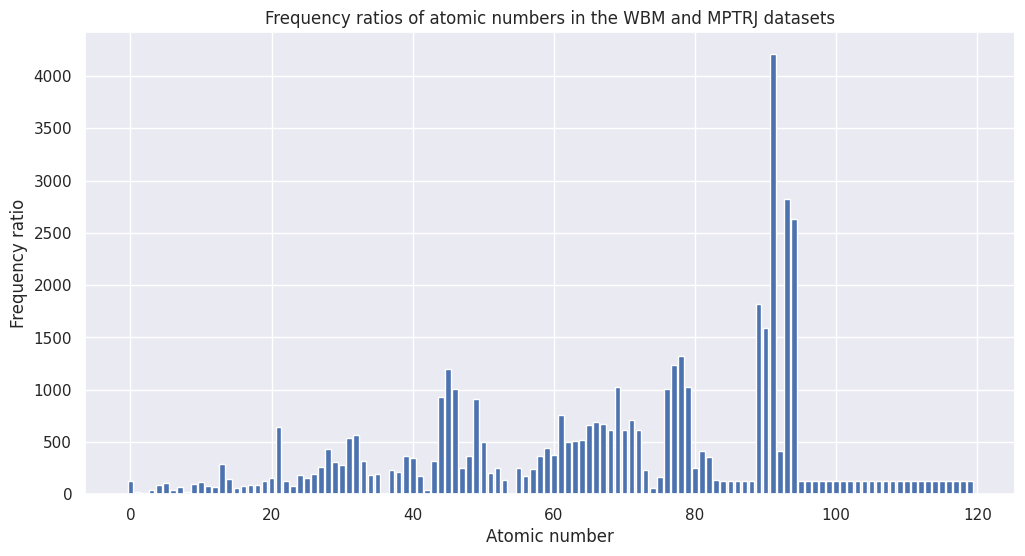

In [10]:
import numpy as np


def compute_freq_ratios(wbm_occurrences, mptrj_occurrences, epsilon=1e-6):
    # Compute frequencies
    wbm_freq = wbm_occurrences / np.sum(wbm_occurrences)
    mptrj_freq = mptrj_occurrences / np.sum(mptrj_occurrences)

    # Compute ratios, adding epsilon to avoid division by zero
    freq_ratios = (wbm_freq + epsilon) / (mptrj_freq + epsilon)

    # Normalize ratios so the minimum is 1.0
    min_ratio = np.min(freq_ratios)
    freq_ratios = freq_ratios / min_ratio

    return freq_ratios


# Compute the frequency ratios
freq_ratios = compute_freq_ratios(atomic_number_counts_wbm, atomic_number_counts_mptrj)
np.save("freq_ratios.npy", freq_ratios)
print(freq_ratios)

# Draw a bar chart of the frequency ratios
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(freq_ratios)), freq_ratios)
plt.xlabel("Atomic number")
plt.ylabel("Frequency ratio")
plt.title("Frequency ratios of atomic numbers in the WBM and MPTRJ datasets")
plt.show()